# 10장의 내용을 활용하여 MNIST 데이터셋을 훈련.
### 문제 : 98% 이상의 정확도

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

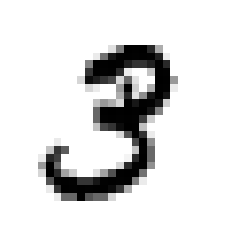

In [5]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

RandomizedSearchCV를 활용해 최적의 하이퍼파라미터 탐색

In [13]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [7]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


In [8]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "n_hidden": [1, 2],
    "n_neurons": np.arange(100, 200)               .tolist(),
    "learning_rate": reciprocal(1e-3, 1e-1)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=10,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])
rnd_search_cv.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/10
1146/1146 [==============================] - 5s 3ms/step - loss: 0.3449 - val_loss: 0.1841
Epoch 2/10
1146/1146 [==============================] - 3s 3ms/step - loss: 0.1534 - val_loss: 0.1217
Epoch 3/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.1046 - val_loss: 0.0991
Epoch 4/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0774 - val_loss: 0.1059
Epoch 5/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0586 - val_loss: 0.0839
Epoch 6/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0478 - val_loss: 0.0907
Epoch 7/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0371 - val_loss: 0.0903
Epoch 8/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0288 - val_loss: 0.0804
Epoch 9/10
1146/1146 [==============================] - 3s 2ms/step - loss: 0.0226 - val_loss: 0.0895
Epoch 10/10
573/573 [

{'learning_rate': 0.09498021382062707, 'n_hidden': 2, 'n_neurons': 161}

찾아낸 최적의 하이퍼파라미터를 이용해 모델 생성/학습

In [14]:
model = build_model(n_hidden = 2, n_neurons = 161, learning_rate = 0.09498021382062707)

In [15]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2844 - accuracy: 0.9150 - val_loss: 0.1619 - val_accuracy: 0.9554
Epoch 2/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1196 - accuracy: 0.9635 - val_loss: 0.1026 - val_accuracy: 0.9694
Epoch 3/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0835 - accuracy: 0.9752 - val_loss: 0.0903 - val_accuracy: 0.9742
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0630 - accuracy: 0.9806 - val_loss: 0.0761 - val_accuracy: 0.9768
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0740 - val_accuracy: 0.9786
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0378 - accuracy: 0.9879 - val_loss: 0.1234 - val_accuracy: 0.9650
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0711 - val_ac

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0772 - accuracy: 0.9822


[0.07721205055713654, 0.982200026512146]

In [36]:
X_new = X_test[:40]
y_new = y_test[:40]

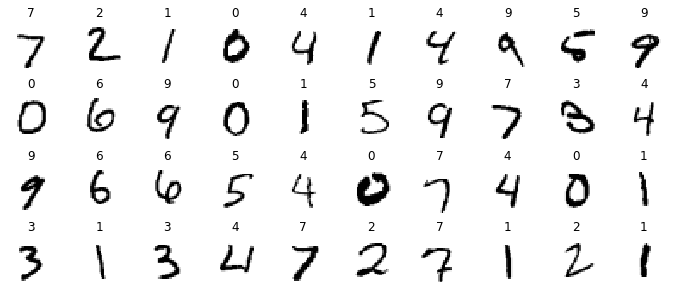

7 2 1 0 4 1 4 9 5 9 
0 6 9 0 1 5 9 7 3 4 
9 6 6 5 4 0 7 4 0 1 
3 1 3 4 7 2 7 1 2 1 


In [43]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_new[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_new[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

j = 0

for i in model.predict(X_new):
  print(np.argmax(i),end=" ")
  j = j+1
  if j % 10 == 0:
    print()